# Visualizing

Pandas plotting methods are good for histograms and lines when the index is the x axis. For categorical data / comparing distributions / most statistical use cases use seaborn.

In [1]:
import pandas as pd
import seaborn as sns

In [10]:
%matplotlib inline

In [2]:
df = pd.read_csv('data/dc-wikia-data-clean.csv')

## Let's recreate the plots from [the FiveThirtyEight report](https://fivethirtyeight.com/features/women-in-comic-books/)

Demo time!

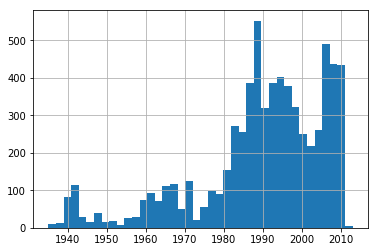

In [11]:
df['year'].hist(bins=40)

In [12]:
def female_count(sex):
    return len(sex[sex == 'Female'])

(1980, 2010)

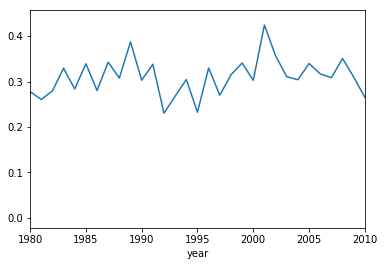

In [26]:
female_df = (
    df.groupby('year')
    .agg({'sex': female_count, 'page_id': 'count'})
    .rename(columns={'sex': 'female_count', 'page_id': 'total'})
)
female_df['ratio'] = female_df['female_count'] / female_df['total']
ax = female_df['ratio'].plot()
ax.set_xlim((1980, 2010))

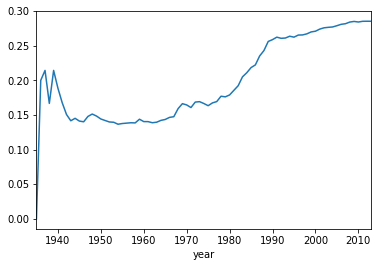

In [27]:
female_cumsum_df = female_df.drop('ratio', axis='columns').cumsum()
(female_cumsum_df['female_count'] / female_cumsum_df['total']).plot()

## *Exercise*

Plot the total number of good characters over time. Plot the total number of bad characters over time. Are there more good or bad guys in DC universe today? When was the transition (approximately)?

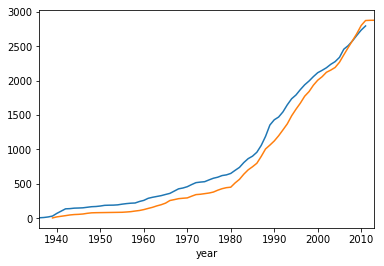

In [37]:
(
    df[df['align'] == 'Good']
    .groupby('year')
    .count()['page_id']
    .cumsum()
    .plot()
)
(
    df[df['align'] == 'Bad']
    .groupby('year')
    .count()['page_id']
    .cumsum()
    .plot()
)

## Some seaborn

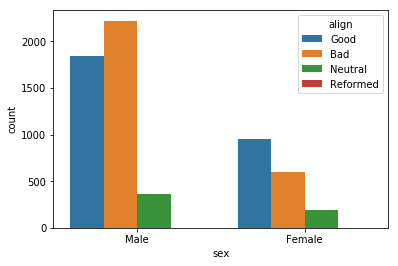

In [39]:
sns.countplot(x='sex', hue='align', data=df, order=['Male', 'Female'])

## *Semi exercise*

Go check the excelent [seaborn tutorial](https://seaborn.pydata.org/tutorial.html)!